<a href="https://colab.research.google.com/github/shreyesss/CVI-Project-apps/blob/master/CV_PS_21_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision and Intelligence Group, CFI- IIT Madras

#Common CV Problem Statement 
## Lane Detection using Computer Vision

Write a python program such that, given an input image of a road with lanes, will give an output image highlighting the lanes on the road, using conventional CV techniques like Colour Spaces, Convolution Operators, Edge Detection and Hough Transform.

Sample input : 

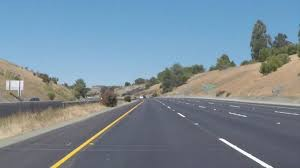

Sample Output : 

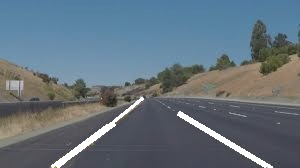

The following cells shall brush-up your knowledge about the above mentioned techniques and the task to be done is at the end. 


Cloning the github repo, and making the current Directory as CV_PS, which has two repositories with images - LD_test_imgs, sample_imgs. 

LD_test_imgs - 
*   test_img01.jpeg 
*   test_img02.jpeg 
*   test_img03.jpeg 

sample_imgs - 

*   hat_lady.png  
*  sample.jpg







In [ ]:
!git clone https://github.com/shreyesss/CVI-Project-apps.git
%cd CVI-Project-apps/CV_PS_imgs/
!ls

## Representing Images in a Computer

<p align="justify"> Consider a pixel, the smallest constituent of an image, such that each pixel displays one particular colour.The image can be represented as a matrix of pixels with each element of the matrix denoting the colour to be displayed by that pixel.</p>



An image is represented by a matrix of the following dimension: (image height) x (image width) x (number of channels).

**For Grayscale Images:**
<p align="justify">Each pixel has one channel represented by an 8-bit number (from 0 to 255). A pixel value of 0 corresponds to Black, while 255 corresponds to white. The values in between correspond to different shades in between.</p>

**RGB Images:** 

Each pixel has three associated channels-

Red- from 0 to 255 

Green- from 0 to 255

Blue- from 0 to 255

(0, 0, 0) => Black

(255, 255, 255) => White

The colour of an RGB image, coming from any pixel, is a mixture of the colours from the three channels.

### Reading, Displaying and Writing an Image to a Path

Functions to be used:

1.   cv2.imread(file_path, flag)

  ```
  flag = 0: read image in Grayscale 
  flag = 1: read image as a BGR image
  ```

2.   cv2.imwrite(file_path, variable_name)

  ```
    variable_name: name of variable holding the image that is to be saved
    ```

3.   cv2.waitKey(delay)

  ```
    delay: waits for a keypress event for 'delay' ms before proceeding to next line
    ```

4.   cv2.imshow(title, variable_name)
  
  However, Google colab crashes if you try to display image using cv2.imshow() instead the following is imported : 

  ```
  from google.colab.patches import cv2_imshow 
  ``` 
  And images can be displayed using cv2_imshow(variable_name),  alternatively plt.imshow(variable_name) can also be used. 


In [ ]:
#Importing a few relevant packages
#The numpy library contains optimised functions that are used to operate on multi-dimensional arrays 
#cv2 is an OpenCV library containing functions used in Computer Vision
#matplotlib is a python plotting library

import numpy as np  
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 

In [ ]:
#EXERCISE: GETTING STARTED WITH IMAGES- READING, DISPLAYING AND WRITING AN IMAGE 

"""
Using the functions described above, write a program to read the image 'sample.jpg' in BGR and Grayscale separately
display them and save the Grayscale image as 'sample_BW.jpg'
"""
#NOTE: Path of sample.jpg is "sample_imgs/sample.jpg"; write sample_BW.jpg to the path "sample_imgs/sample_BW.jpg" 











## Colour Spaces

**A colour space is a map from a certain colour to a set of numbers (usually 8-bit in size). Different colour spaces (functions) may be advantageous for different purposes.**

Let's look at a few colorspaces used commonly, a few of which we'll use for lane detection.

1. Grayscale


2. BGR : <p align="justify">Various colours are obtained by a linear combination of Blue, Green and Red values. (2^24 = 16,777,216 possibilities). The three channels are correlated by the amount of light hitting the surface.  In BGR colour space, chrominance (colour related information) and luminance (intensity related information) tend to get mixed. This makes colour based segmentation (separation of components of the image) difficult in BGR colourspace. Also, a difference in lighting would alter the values of the three channels quite drastically.</p>


3. HSV- HSV images have three components:
        a. Hue (Dominant Wavelength Information)
        b. Saturation (Purity or shades of the colour)
        c. Value (Intensity)
    Since there is only one variable giving the information about the colour, it is easier to segment images based on colour in the HSV space. 
    
4. CMYK- This colour space is mainly used in printing. The components are Cyan, Magenta, Yellow and Black

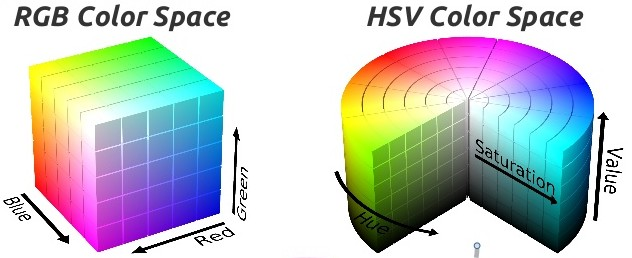

### Converting between Colour Spaces in OpenCV

Often, we would need to use different colour spaces during image processing as certain features may be easier to extract in one colour space over another. 

Function:

cv2.cvtColor(input_image, flag)

```
flag: Specifies the type of conversion
cv2.COLOR_BGR2GRAY- Converts BGR image to Grayscale, the Grayscale channel value is the average of the B, G and R channel values
cv2.COLOR_GRAY2BGR- Converts Grayscale image to BGR. The Grayscale value is simply copied to all the three channels
cv2.COLOR_BGR2HSV
cv2.COLOR_HSV2BGR
```





Conversion from RGB to HSV

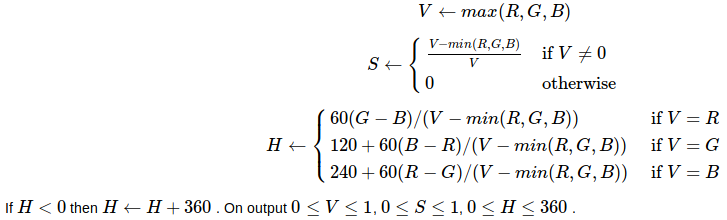

Try to write a code to convert an input image in BGR format to Grayscale and HSV, and display them, using OpenCV functions. Read the image 'hat_lady.png' from the folder 'sample_imgs'. 

In [ ]:
#EXERCISE: CHANGING COLOUR SPACES 

"""
Using the functions described above, write a program to read the image 'hat_lady.png' in BGR convert them to
GRAY and HSV, use numpy slicing to store hue, saturation and value channels separately in variables, display 
all the images (except the input) in separate windows. 
"""
#NOTE: Path of hat_lady.png is "sample_imgs/hat_lady.png"











## The  2D Convolution Operation

A 1D Convolution Operation on two discrete functions f(n) and g(n) may be defined as:

$$ y(n) =  \sum \limits _{k=-\infty} ^{+\infty} f(k)g(n-k)  $$

This operation may be summarised in the following steps:

1. Express each function in terms of a dummy variable k

2. Reflect the function g(k) about the y-axis. g(k)->g(-k)

3. Shift the function g(-k) by n units to the right, where n is the value at which we wish to compute y

4. <p align="Justify">Take an element-wise product of g(n-k) and f(k). Now sum over the products for all values of k from -inf to +inf. The sum is equal to the value of y at n.</p>


<p align="Justify">For our purposes, we may *convolve* our image matrix with a **filter matrix** in 2 Dimensions. The filters may be used for specific purposes such as blurring, sharpening, edge detection, corner detection etc.</p>

Consider the following filter used for sharpening an image:

$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1\\
0 & -1 & 0
\end{bmatrix}
$$

**2D convolution of the image matrix with the filter consists of the following steps:**

1. Flip the filter both horizontally and vertically.

2. <p align="Justify">Put the first element of the kernel at every pixel of the image (element of the image matrix). Then each element of the kernel will stand on top of an element of the image matrix.</p>

3. To calculate the value of convolution output at pixel (2,2), center the kernel at that position on the image matrix.

4. Multiply each element of the kernel with its corresponding element of the image matrix (the one which is overlapped with it)

5. Sum up all product outputs and put the result at the same position in the output matrix as the center of kernel in image matrix.

6. <p align="Justify">For the pixels on the border of image matrix, some elements of the kernel will stand out of the image matrix and therefore does not have any corresponding element from the image matrix. In this case, we may apply 0-padding to the input matrix (based on the size of the kernel we might need one or more pixels padding, in our example we just need 1 pixel padding).</p>

If after the convolution operation, an output element happens to exceed 255 or is less than 0, it is thresholded to 255 or 0 respectively.

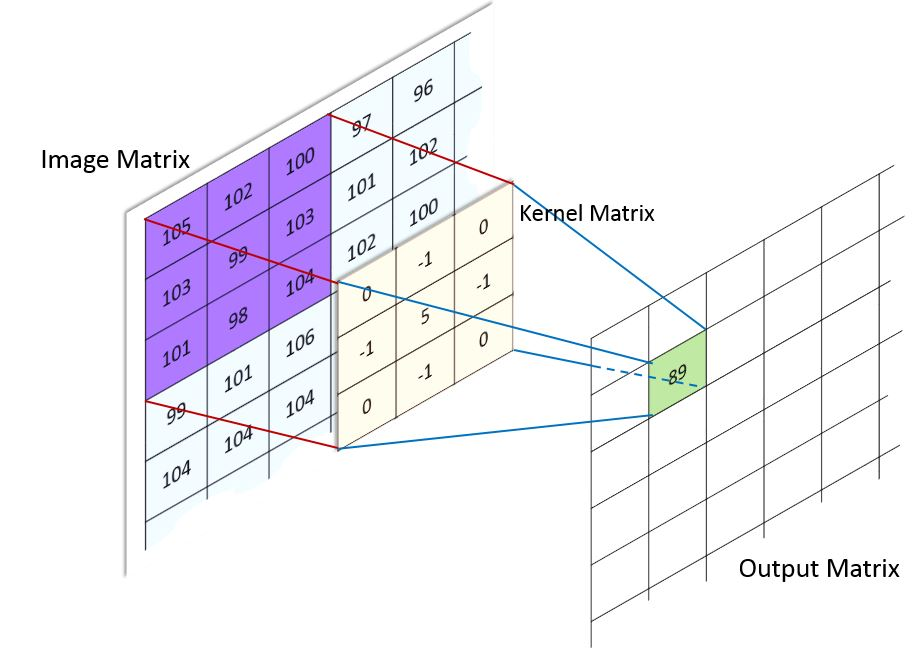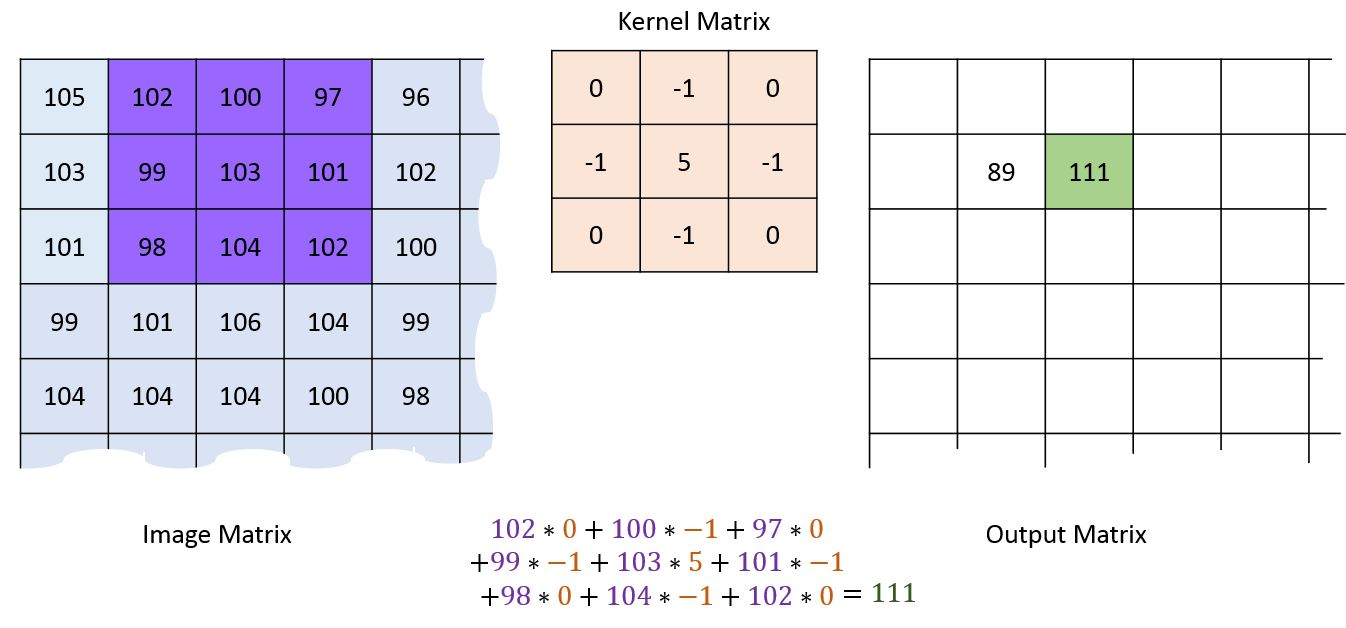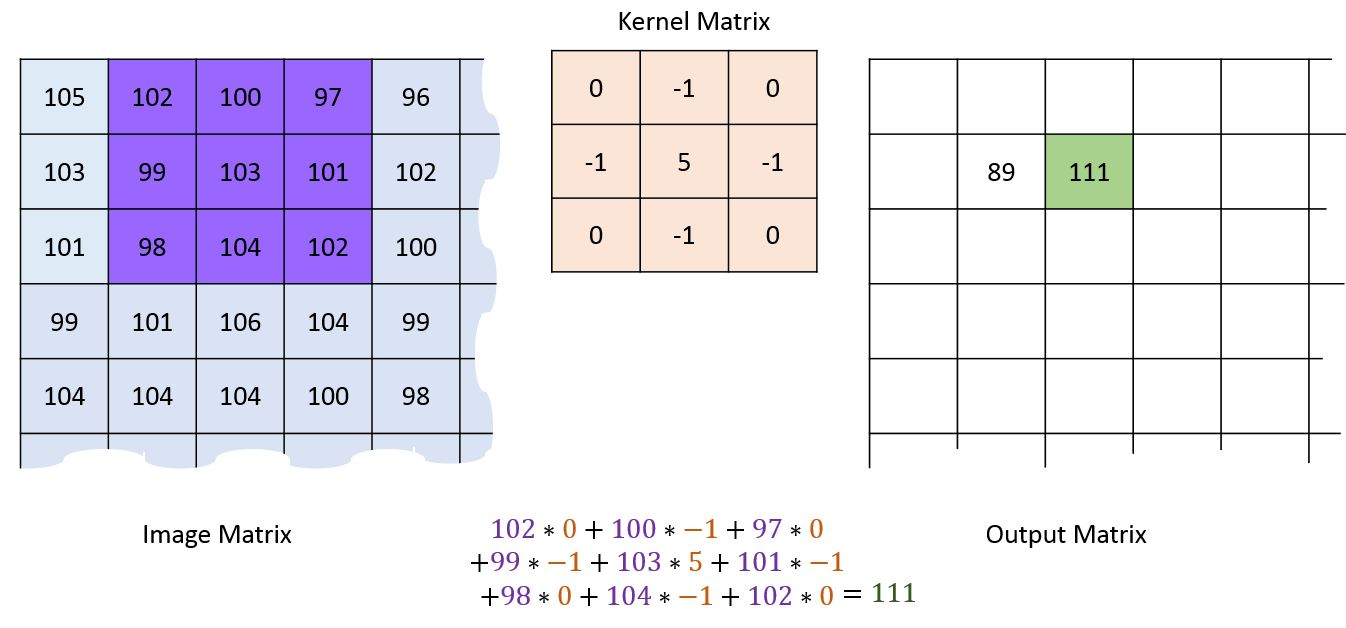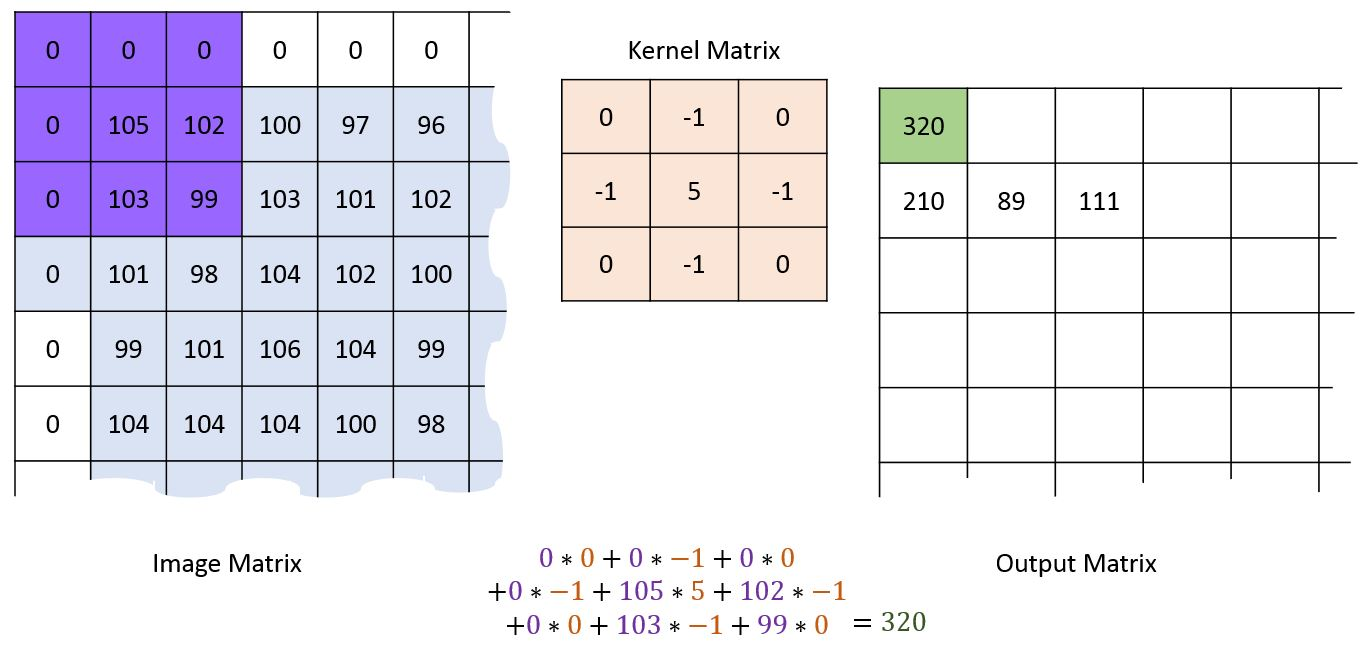

**Parameters of a 2D convolution operation:**

1. Size of the kernel (F)

2. <p align="Justify">Stride (S)- Number of steps by which the centre of the kernel is slid, after every iteration. This need not always be one, especially when the output matrix is smaller in dimension when compared to the input matrix (image)</p>

3. Padding (P)- Size of the zero-padding.

<p align="Justify">The size of the output matrix ($N_o$) is dependent on these parameters as well as the size of the input matrix ($N_i$, 
assuming all matrices are square), as:</p>

$ N_o = (N_i - F + 2P)/S +1 $

**Implementing 2D convolution on a Matrix:**

Now, let's implement a convolution operation on an image.
Functions to be used:

1.   **numpy.zeros(shape, dtype, order)- creates a numpy array with all elements 0**

  ```
  shape: shape of matrix to be created
  dtype: data type of elements to be held (if the matrix is to be manipulated)
  order: whether the multi-dimensional data is to be stored in row-major or column-major form
  ```

2.  **cv2.filter2D(src, ddepth, kernel)**

  ```
  src: source, input matrix
  ddepth: Depth of the output matrix (for 2D convolution on 3D matrices), if ddepth = -1, the output image has the same depth as the input image
  kernel: filter matrix
  ```



<p align="Justify">Once you implement the code, experiment with the values of the kernel and observe how that changes the output image. Remember that when the kernel element values are high  in magnitude (positive or negative), you are more likely to cause the pixel value of the output to get thresholded at 255(positive) or 0(negative).</p>


In [ ]:
#EXERCISE : 2D CONVOLUTION OPERATION 

"""
Write a program that performs a 2D convolution on the image 'hat_lady.png' with a 3x3 kernel, create a 
randomkernel with element values of your choice. Remember that if the kernel weights are too high or too 
low, the pixels get thresholded to 255 or 0 respectively. 
"""












If you want to sharpen, blur the image or detect edges in an image, you may try the following kernels:

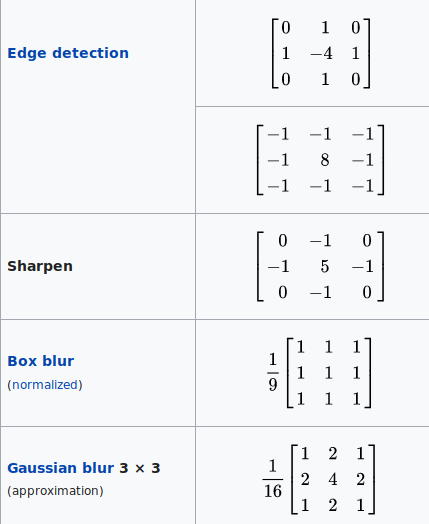


## Edge Detection

<p align="Justify">Gradients provide the direction of greatest ascent of a function. Therefore, regions where there is a drastic change in intensity would have gradients of strong magnitude. In order to detect edges, we compute the gradients of the intensity with respect to x and y (image co-ordinates) and look for regions where the magnitude of the gradient is above a certain threshold.</p>

<p align="Justify">In order to compute the gradients and find regions of high gradient magnitude, we may use the following filters. These filters are convolved with the input image.</p> 

1. <p align="Justify">Sobel Operator: The input is convolved with two filters of odd size- one to obtain Gradients in x ($G_x$) and another to obtain Gradients in y ($G_y$):</p>

$$
G_x = 
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}
$$

$$
G_y = 
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0\\
1 & 2 & 1
\end{bmatrix}
$$

The magnitude of the gradient may be computed as:

(L2 Distance)
$$G = \sqrt{G_x^2 + G_y^2} $$ 

or

(L1 Distance)
$$G = |G_x| + |G_y| $$ 
        

2. <p align="Justify">GScharr Operator: This is a more accurate version of the Sobel operator, with different weights for the kernel.</p>

3. <p align="Justify">Laplace Operator: Instead of computing the first-order derivative, the Laplace operator checks for the double derivative to be zero. </p>

<p align="Justify">For our purposes, we are going to use a method known as the Canny Edge Detection. The OpenCV function for Canny detection (cv2.Canny()) uses the Sobel Kernel.</p>

### Canny Edge Detection

Canny Edge Detection involves the following steps:

1. Gaussian Blurring to remove noise 
        The presence of noise in the image will give erroneous edges
        Weights are sampled from a Gaussian distribution

2. Applying the Sobel Filter

3. Non-max suppression of Gradients 
        Suppresses all gradient values in the direction of the gradient except the local maxima
        This ensures that the edges are thin
        Also, notice that this complies with the fact that the gradient at every point is normal to the edge
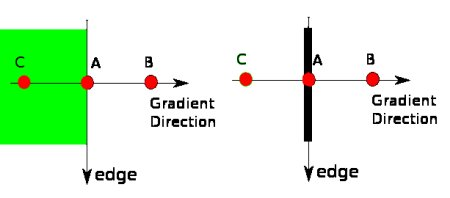
        

4. Double Thresholding
        Selects two threshold values for gradient magnitude: upper and lower
        If the magnitude is greater than the upper threshold, the gradient is considered to be a STRONG GRADIENT
        If the magnitude lies between the two thresholds, then it is a WEAK GRADIENT
        Gradients will magnitude lesser than the lower threshold are suppressed
        This is done in order to remove erroneous edges, the threshold values are parameters for the Canny() function
        Maintain an upper: lower ratio between (2:1) and (3:1)

5. Hysteresis
        The strong edges are classified as true edges
        Weak edges that are somehow connected to the strong edges are also considered as true edges
        Weak edges that are not connected to the strong edges are non-edges, they are removed

<p align="Justify">Note:  Gaussian Blurring must be done before calling the cv2.Canny() function. cv2.Canny() is defined for images with one channel; therefore the input image must be in Grayscale</p>

#### Edge Detection with the cv2.Canny() Function:

**Functions to be used:**

1. **cv2.GaussianBlur(img, ksize, sigmaX, sigmaY)**

  ```
  img: input image
  ksize: size of the kernel
  sigmaX: standard deviation in X-direction
  sigmaY: standard deviation in Y-direction, if sigmaY is not specified, the value of sigmaX is copied to sigmaY; if both are zero, a default sigma value defined based on kernel size is used
  ```

2. **cv2.Canny(src, minVal, maxVal, ksize, L2gradient)**

  ```
  src: input matrix
  minVal: lower threshold value for double thresholding
  maxVal: upper threshold value for double thresholding
  ```


In [ ]:
#EXERCISE : EDGE DETECTION 

"""
write a Program that performs Gaussian Bluriing and Canny edge Detection on 'hat_lady.png',
Display the Canny Output.
"""











## Motivation for Lane Detection 

<p align="Justify">Let's come to our lane detection problem. Starting with the image, we are now well-equipped to get a contour of the edges in the image.</p>

<p align="Justify">Since most lanes are either white or yellow, we may simplify our problem by selecting the white and yellow components in the image. Note that, yellow is more distinct in the HSV colour space than the RGB colour space; and we may use the grayscale version of the image to filter the whites in the image.</p>

Thus, the steps to get a contour of the edges are:
1. Create a mask that picks the yellow and white pixels in the image

2. Blur the image using a Gaussian filter

3. Apply Canny edge detector

<p align="Justify">The contour of edges obtained may contain breaks and may be noisy. Also, usually the lane markings on road are not continuous, while what we require are continuous curves that act as boundaries between one lane and another.</p>

<p align="Justify">Our next task would be to approximate the edges corresponding to the lanes using appropriate functions. We shall stick to finding straight lines today, since that deals with most cases we would come across. Finding functions like arcs (for curved roads) is merely an extension of the straight line case. We will find a straight line representing the lanes using a technique known as the Hough Transform.</p>

<p align="Justify">But before that, let's reduce the complexity of the problem by selecting regions of interest. Most images that we will deal with will contain foreground objects like roads and lanes, and background objects like buildings, trees and sky.A rudimentary way to select the Region of Interest (RoI) would be to arbitrarily define coordinates for the region of interest.</p> 

## Hough Transform 

<p align="Justify">Given a set of points that seem to fall on a certain curve, which can be represented mathematically, one may use the Hough transform to obtain the equation of the curve. Here, we will consider the Hough Transform for straight lines.</p>

A straight line may be represented parametrically as:

$$ \rho = x.\cos\theta + y.\sin\theta $$

<p align="Justify">where $\rho$ is the perpendicular distance to the line from the origin and $\theta$ is the angle subtended by the perpendicular and the x-axis</p>

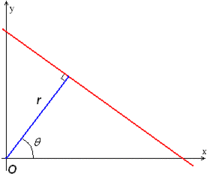

<p align="Justify">Thus, any line in the x-y plane may be represented using the two parameters ($\rho$, $\theta$). The Hough Transform finds those values of $\rho$ and $\theta$ that pass through a large number of points in the image (above a certain threshold).</p>

**Accumulator (or Hough Space):**

<p align="Justify">The Transform creates a 2D accumulator array with rows representing values of $\rho$ and columns representing values of $\theta$. The size of the array varies according to the accuracy required.
The maximum possible value of $\rho$ is the diagonal length of the image, therefore for one pixel accuracy, the number of rows is equal to the diagonal length of the image. For a $\theta$ accuracy of 1 degree, there will be 360 columns in the accumulator.</p>

<p align="Justify">Now consider the grayscale image of the edges of the image. Every white point in this image belongs to an edge. For every white point in the image, the Hough Transform finds all the pairs ($\rho$, $\theta$) that result in lines which pass through the point. For every ($\rho$, $\theta$) pair obtained, the corresponding element in the accumulator array is incremented by 1.</p>

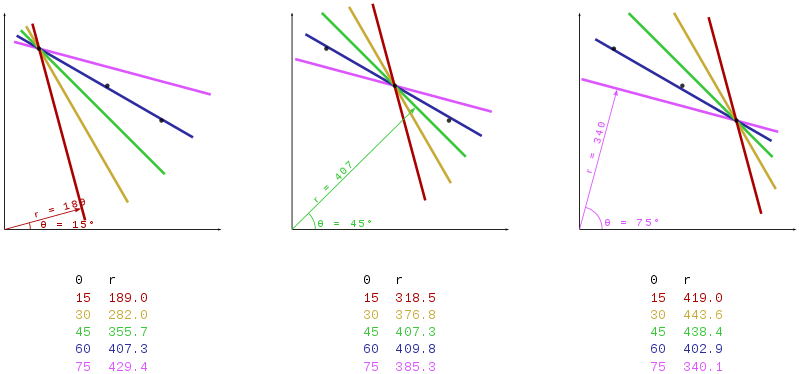

<p align="Justify">Whenever points on a certain line ($\rho'$, $\theta'$) undergo this process, the element corresponding to ($\rho'$, $\theta'$) in the accumulator is incremented, in addition to other lines ($\rho$, $\theta$) which pass through the point. Finally, the accumulator holds a count of the number of pixels that belong to a certain line. Values of ($\rho$, $\theta$) for which this count exceeds a pre-defined threshold is considered to be a *true line*. As you can see, this method is not affected by small noises and breaks.</p>

**OpenCV Functions for Hough Transform for Straight Lines:**

<p align="Justify">There are two functions in cv2 that performs the Hough Transform for a given image. The function cv2.HoughLines() performs the transform according to the procedure described above. The function cv2.HoughLinesP()- Probabilistic Hough Transform- is an optimised version of cv2.HoughLines(). This function reduces the computation by considering only a random subset of the points in the image; for good results, the threshold of the Probabilistic Hough Transform must be lower than that of the regular Hough Transform.</p>


```
cv2.HoughLinesP(edges, rho_accuracy, theta_accuracy, threshold, minLineLength, maxLineGap)

minLineLength: Minimum length of line. Line segments shorter than this are rejected
maxLineGap: Maximum allowed gap between line segments to treat them as single line

```


The function returns the two endpoints of the lines. 



### Structure for the Lane Detector (try coding on your own)

We may define the following functions in order to make the program more modular:

1. **img2edge(img):** 
<p align="Justify">A function which takes the input image (img), uses a mask to pick yellow and white pixels, does Gaussian Blurring and Canny Edge Detection.</
p> 

  Returns canny_output (a contour of edges)


2. **roi_select(img, canny_output):** 
<p align="Justify">Reads in the canny_output, returns canny_roi: canny_output with irrelevant regions of the image reset to 0 (blacked out). The RoI is defined using dimensions of img.</p>

3. **draw_lines(canny_roi, rho_acc, theta_acc, thresh, minLL, maxLG):** 
<p align="Justify">Inputs canny_roi, performs Probabilistic Hough Transform on it. Draws lines on a blank image using the values returned by HoughLinesP() and the openCV function cv2.line()</p>

  Parameters for HoughLinesP() are passed in as parameters to draw_lines()

  Returns img_lines: image of lines against a black background
                         
4. **add_weighted(img, img_lines):**

  Computes a weighted sum of the original image and the image  of lines. 

  Returns lane_img: image with lanes

In [ ]:
# MINI-PROJECT: LANE DETECTION

"""
Input for Program: Image of a road with clearly labelled lanes
Expected Output: Lanes highlighted with white superimposed on the original image
Read the input images from the folder 'LD_test_imgs' and show the output images in the notebook.
You may check the following functions out:
1. cv2.inRange()
2. cv2.bitwise_or() and cv2.bitwise_and
3. cv2.fillPoly()
4. cv2.line()
5. cv2.addWeighted()
In addition, you may consider the structure of the program (functions that one may define) we discussed 
in the previous cell.

Fill in your code in place of 'pass'.
"""

def img2edge(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hsv_image  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    """
    Define ranges for 'yellow', pixels within this range will be picked
    """
    lower_yellow = pass
    upper_yellow = pass 

    """
    cv2.inRange(): Picks pixels from the image that are in the specified range
    """
    mask_y = pass      
    mask_w = cv2.inRange(gray_image, 216, 255)
  
    """
    Compute Bitwise OR, combining both the white and yellow pixels
    """
    mask_yw = pass

    """
    Compute Bitwise AND of mask_yw with gray_img, pixels that were yellow or 
    white will have the same intensity as the original grayscale image, the 
    other pixels will be removed.
    """
    mask_yw_image = pass 

    img_blur = cv2.GaussianBlur(mask_yw_image, (3, 3), 0)
    img_canny = cv2.Canny(img_blur, 70, 200)

    return img_canny
    
def roi_select(img, canny):
    """
    Define the vertices of the region of interest
    """
    lower_left = pass
    lower_right = pass
    top_left = pass
    top_right = pass
    vertices = [np.array([lower_left,top_left,top_right,lower_right],dtype=np.int32)]
    
    mask = np.zeros_like(canny)                     #creates a numpy array of the same dimensions as img
    fill_color = 255                                #parameter for cv2.fillPoly function
    cv2.fillPoly(mask, vertices, fill_color)        #pixels within 'vertices' in 'mask' will be made WHITE while all other pixels will be BLACK

    return cv2.bitwise_and(canny, mask)

def draw_lines(canny_roi, rho_acc, theta_acc, thresh, minLL, maxLG):
    """
    Inputs - canny_roi 
    Parameters of HoughLinesP() are passed in as parameters to draw_lines()
    Output - line_img (image of lines against a black background)

    Perform Probabilistic Hough Transform on it, draw lines on a blank image using the values 
    returned by HoughLinesP() and the openCV function cv2.line(). 
    """  
    pass

    return line_img

def add_weighted(img, line_img):
    return cv2.addWeighted(img, 0.8, line_img, 1, 0)

"""
The below code is for a single image, perform the same procedure for all the images in the
directory 'LD_test_imgs' and display all of them in  output of the cell. 
"""
img = pass                                                      #Read the input image from the directory.
edge_img = img2edge(img)
roi_img = roi_select(img, edge_img)
hough_img = draw_lines(roi_img, 2, np.pi/180, 50, 50, 100)      #Change the parameters thresh, minLL, maxLG to get more accurate lines
lane_img = add_weighted(img, hough_img)
cv2_imshow(lane_img)


**End of Problem Statement**

A single .ipynb file named 'Roll_Name_CVI-CV_PS.ipynb' should be submitted. 